In [5]:
import torch
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

from torch import nn
from copy import deepcopy
from tqdm import tqdm
from bayes_opt import BayesianOptimization

In [6]:
class BasicPolicyGradient:
    def __init__(self, env, learning_rate=0.01):
        self.env = env

        # Define a simple feedforward neural network
        self.model = nn.Sequential(
            nn.Linear(env.observation_space.shape[0], 64),
            nn.ReLU(),
            nn.Linear(64, env.action_space.n),
            nn.Softmax(dim=-1)
        )

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)

    def get_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.model(state)
        m = torch.distributions.Categorical(probs)
        action = m.sample()
        return action.item(), m.log_prob(action)

    def update_policy(self, total_reward, log_probs):
        policy_loss = []
        for log_prob in log_probs:
            policy_loss.append(-log_prob * total_reward)
        policy_loss = torch.cat(policy_loss).sum()

        self.optimizer.zero_grad()
        policy_loss.backward()
        self.optimizer.step()

In [7]:
def policy_gradient_main(episodes):
    
    env = gym.make('CartPole-v1')
    policy = BasicPolicyGradient(env)

    episode_rewards = []

    for episode in range(episodes):
        
        state = env.reset()
        rewards = []
        log_probs = []
        done = False
        
        while not done:
            action, log_prob = policy.get_action(state)
            state, reward, done, _ = env.step(action)

            rewards.append(reward)
            log_probs.append(log_prob)

            if done:
                total_reward = sum(rewards)
                print(f"[Episode: {episode}] - Reward: {total_reward}")
                policy.update_policy(total_reward, log_probs)
                episode_rewards.append(total_reward)
                break
    
    return episode_rewards

In [8]:
# Running the basic policy gradient algorithm
pg_rewards = policy_gradient_main(episodes=10000)

[Episode: 0] - Reward: 22.0
[Episode: 1] - Reward: 16.0
[Episode: 2] - Reward: 18.0
[Episode: 3] - Reward: 15.0
[Episode: 4] - Reward: 11.0
[Episode: 5] - Reward: 10.0
[Episode: 6] - Reward: 37.0
[Episode: 7] - Reward: 12.0
[Episode: 8] - Reward: 8.0
[Episode: 9] - Reward: 13.0
[Episode: 10] - Reward: 15.0
[Episode: 11] - Reward: 27.0
[Episode: 12] - Reward: 21.0
[Episode: 13] - Reward: 22.0
[Episode: 14] - Reward: 50.0
[Episode: 15] - Reward: 21.0
[Episode: 16] - Reward: 35.0
[Episode: 17] - Reward: 9.0
[Episode: 18] - Reward: 16.0
[Episode: 19] - Reward: 38.0
[Episode: 20] - Reward: 58.0
[Episode: 21] - Reward: 15.0
[Episode: 22] - Reward: 29.0
[Episode: 23] - Reward: 33.0
[Episode: 24] - Reward: 28.0
[Episode: 25] - Reward: 23.0
[Episode: 26] - Reward: 19.0
[Episode: 27] - Reward: 31.0
[Episode: 28] - Reward: 29.0
[Episode: 29] - Reward: 20.0
[Episode: 30] - Reward: 87.0
[Episode: 31] - Reward: 23.0
[Episode: 32] - Reward: 16.0
[Episode: 33] - Reward: 23.0
[Episode: 34] - Reward: 29

[Episode: 279] - Reward: 38.0
[Episode: 280] - Reward: 17.0
[Episode: 281] - Reward: 14.0
[Episode: 282] - Reward: 16.0
[Episode: 283] - Reward: 41.0
[Episode: 284] - Reward: 16.0
[Episode: 285] - Reward: 24.0
[Episode: 286] - Reward: 44.0
[Episode: 287] - Reward: 13.0
[Episode: 288] - Reward: 68.0
[Episode: 289] - Reward: 14.0
[Episode: 290] - Reward: 49.0
[Episode: 291] - Reward: 29.0
[Episode: 292] - Reward: 37.0
[Episode: 293] - Reward: 132.0
[Episode: 294] - Reward: 68.0
[Episode: 295] - Reward: 55.0
[Episode: 296] - Reward: 75.0
[Episode: 297] - Reward: 28.0
[Episode: 298] - Reward: 118.0
[Episode: 299] - Reward: 59.0
[Episode: 300] - Reward: 65.0
[Episode: 301] - Reward: 137.0
[Episode: 302] - Reward: 51.0
[Episode: 303] - Reward: 44.0
[Episode: 304] - Reward: 19.0
[Episode: 305] - Reward: 30.0
[Episode: 306] - Reward: 40.0
[Episode: 307] - Reward: 9.0
[Episode: 308] - Reward: 17.0
[Episode: 309] - Reward: 8.0
[Episode: 310] - Reward: 17.0
[Episode: 311] - Reward: 14.0
[Episode:

[Episode: 561] - Reward: 60.0
[Episode: 562] - Reward: 68.0
[Episode: 563] - Reward: 79.0
[Episode: 564] - Reward: 117.0
[Episode: 565] - Reward: 33.0
[Episode: 566] - Reward: 67.0
[Episode: 567] - Reward: 86.0
[Episode: 568] - Reward: 33.0
[Episode: 569] - Reward: 32.0
[Episode: 570] - Reward: 40.0
[Episode: 571] - Reward: 32.0
[Episode: 572] - Reward: 42.0
[Episode: 573] - Reward: 24.0
[Episode: 574] - Reward: 30.0
[Episode: 575] - Reward: 19.0
[Episode: 576] - Reward: 25.0
[Episode: 577] - Reward: 40.0
[Episode: 578] - Reward: 20.0
[Episode: 579] - Reward: 35.0
[Episode: 580] - Reward: 28.0
[Episode: 581] - Reward: 28.0
[Episode: 582] - Reward: 20.0
[Episode: 583] - Reward: 19.0
[Episode: 584] - Reward: 24.0
[Episode: 585] - Reward: 22.0
[Episode: 586] - Reward: 30.0
[Episode: 587] - Reward: 31.0
[Episode: 588] - Reward: 30.0
[Episode: 589] - Reward: 19.0
[Episode: 590] - Reward: 17.0
[Episode: 591] - Reward: 16.0
[Episode: 592] - Reward: 23.0
[Episode: 593] - Reward: 17.0
[Episode:

[Episode: 837] - Reward: 43.0
[Episode: 838] - Reward: 56.0
[Episode: 839] - Reward: 33.0
[Episode: 840] - Reward: 48.0
[Episode: 841] - Reward: 50.0
[Episode: 842] - Reward: 39.0
[Episode: 843] - Reward: 28.0
[Episode: 844] - Reward: 56.0
[Episode: 845] - Reward: 90.0
[Episode: 846] - Reward: 66.0
[Episode: 847] - Reward: 40.0
[Episode: 848] - Reward: 102.0
[Episode: 849] - Reward: 52.0
[Episode: 850] - Reward: 42.0
[Episode: 851] - Reward: 117.0
[Episode: 852] - Reward: 59.0
[Episode: 853] - Reward: 69.0
[Episode: 854] - Reward: 50.0
[Episode: 855] - Reward: 81.0
[Episode: 856] - Reward: 56.0
[Episode: 857] - Reward: 75.0
[Episode: 858] - Reward: 39.0
[Episode: 859] - Reward: 142.0
[Episode: 860] - Reward: 103.0
[Episode: 861] - Reward: 39.0
[Episode: 862] - Reward: 124.0
[Episode: 863] - Reward: 40.0
[Episode: 864] - Reward: 100.0
[Episode: 865] - Reward: 121.0
[Episode: 866] - Reward: 35.0
[Episode: 867] - Reward: 58.0
[Episode: 868] - Reward: 38.0
[Episode: 869] - Reward: 66.0
[Ep

[Episode: 1136] - Reward: 37.0
[Episode: 1137] - Reward: 52.0
[Episode: 1138] - Reward: 50.0
[Episode: 1139] - Reward: 47.0
[Episode: 1140] - Reward: 40.0
[Episode: 1141] - Reward: 47.0
[Episode: 1142] - Reward: 40.0
[Episode: 1143] - Reward: 41.0
[Episode: 1144] - Reward: 59.0
[Episode: 1145] - Reward: 44.0
[Episode: 1146] - Reward: 38.0
[Episode: 1147] - Reward: 75.0
[Episode: 1148] - Reward: 40.0
[Episode: 1149] - Reward: 52.0
[Episode: 1150] - Reward: 65.0
[Episode: 1151] - Reward: 64.0
[Episode: 1152] - Reward: 68.0
[Episode: 1153] - Reward: 49.0
[Episode: 1154] - Reward: 66.0
[Episode: 1155] - Reward: 69.0
[Episode: 1156] - Reward: 84.0
[Episode: 1157] - Reward: 50.0
[Episode: 1158] - Reward: 57.0
[Episode: 1159] - Reward: 51.0
[Episode: 1160] - Reward: 44.0
[Episode: 1161] - Reward: 47.0
[Episode: 1162] - Reward: 51.0
[Episode: 1163] - Reward: 40.0
[Episode: 1164] - Reward: 43.0
[Episode: 1165] - Reward: 54.0
[Episode: 1166] - Reward: 65.0
[Episode: 1167] - Reward: 81.0
[Episode

[Episode: 1410] - Reward: 121.0
[Episode: 1411] - Reward: 41.0
[Episode: 1412] - Reward: 34.0
[Episode: 1413] - Reward: 54.0
[Episode: 1414] - Reward: 46.0
[Episode: 1415] - Reward: 79.0
[Episode: 1416] - Reward: 37.0
[Episode: 1417] - Reward: 75.0
[Episode: 1418] - Reward: 87.0
[Episode: 1419] - Reward: 36.0
[Episode: 1420] - Reward: 125.0
[Episode: 1421] - Reward: 40.0
[Episode: 1422] - Reward: 95.0
[Episode: 1423] - Reward: 143.0
[Episode: 1424] - Reward: 156.0
[Episode: 1425] - Reward: 148.0
[Episode: 1426] - Reward: 120.0
[Episode: 1427] - Reward: 77.0
[Episode: 1428] - Reward: 100.0
[Episode: 1429] - Reward: 85.0
[Episode: 1430] - Reward: 97.0
[Episode: 1431] - Reward: 87.0
[Episode: 1432] - Reward: 77.0
[Episode: 1433] - Reward: 102.0
[Episode: 1434] - Reward: 62.0
[Episode: 1435] - Reward: 57.0
[Episode: 1436] - Reward: 45.0
[Episode: 1437] - Reward: 68.0
[Episode: 1438] - Reward: 84.0
[Episode: 1439] - Reward: 89.0
[Episode: 1440] - Reward: 114.0
[Episode: 1441] - Reward: 66.0

[Episode: 1679] - Reward: 45.0
[Episode: 1680] - Reward: 70.0
[Episode: 1681] - Reward: 45.0
[Episode: 1682] - Reward: 37.0
[Episode: 1683] - Reward: 71.0
[Episode: 1684] - Reward: 74.0
[Episode: 1685] - Reward: 43.0
[Episode: 1686] - Reward: 50.0
[Episode: 1687] - Reward: 50.0
[Episode: 1688] - Reward: 93.0
[Episode: 1689] - Reward: 56.0
[Episode: 1690] - Reward: 39.0
[Episode: 1691] - Reward: 48.0
[Episode: 1692] - Reward: 61.0
[Episode: 1693] - Reward: 62.0
[Episode: 1694] - Reward: 39.0
[Episode: 1695] - Reward: 60.0
[Episode: 1696] - Reward: 38.0
[Episode: 1697] - Reward: 77.0
[Episode: 1698] - Reward: 54.0
[Episode: 1699] - Reward: 34.0
[Episode: 1700] - Reward: 118.0
[Episode: 1701] - Reward: 53.0
[Episode: 1702] - Reward: 60.0
[Episode: 1703] - Reward: 139.0
[Episode: 1704] - Reward: 54.0
[Episode: 1705] - Reward: 73.0
[Episode: 1706] - Reward: 55.0
[Episode: 1707] - Reward: 46.0
[Episode: 1708] - Reward: 64.0
[Episode: 1709] - Reward: 63.0
[Episode: 1710] - Reward: 95.0
[Episo

[Episode: 1948] - Reward: 202.0
[Episode: 1949] - Reward: 154.0
[Episode: 1950] - Reward: 114.0
[Episode: 1951] - Reward: 123.0
[Episode: 1952] - Reward: 153.0
[Episode: 1953] - Reward: 149.0
[Episode: 1954] - Reward: 120.0
[Episode: 1955] - Reward: 237.0
[Episode: 1956] - Reward: 164.0
[Episode: 1957] - Reward: 150.0
[Episode: 1958] - Reward: 194.0
[Episode: 1959] - Reward: 125.0
[Episode: 1960] - Reward: 129.0
[Episode: 1961] - Reward: 206.0
[Episode: 1962] - Reward: 135.0
[Episode: 1963] - Reward: 136.0
[Episode: 1964] - Reward: 133.0
[Episode: 1965] - Reward: 124.0
[Episode: 1966] - Reward: 145.0
[Episode: 1967] - Reward: 140.0
[Episode: 1968] - Reward: 251.0
[Episode: 1969] - Reward: 168.0
[Episode: 1970] - Reward: 170.0
[Episode: 1971] - Reward: 124.0
[Episode: 1972] - Reward: 119.0
[Episode: 1973] - Reward: 145.0
[Episode: 1974] - Reward: 149.0
[Episode: 1975] - Reward: 128.0
[Episode: 1976] - Reward: 129.0
[Episode: 1977] - Reward: 109.0
[Episode: 1978] - Reward: 134.0
[Episode

[Episode: 2238] - Reward: 67.0
[Episode: 2239] - Reward: 61.0
[Episode: 2240] - Reward: 60.0
[Episode: 2241] - Reward: 51.0
[Episode: 2242] - Reward: 77.0
[Episode: 2243] - Reward: 57.0
[Episode: 2244] - Reward: 84.0
[Episode: 2245] - Reward: 77.0
[Episode: 2246] - Reward: 72.0
[Episode: 2247] - Reward: 60.0
[Episode: 2248] - Reward: 52.0
[Episode: 2249] - Reward: 48.0
[Episode: 2250] - Reward: 50.0
[Episode: 2251] - Reward: 60.0
[Episode: 2252] - Reward: 76.0
[Episode: 2253] - Reward: 76.0
[Episode: 2254] - Reward: 76.0
[Episode: 2255] - Reward: 53.0
[Episode: 2256] - Reward: 79.0
[Episode: 2257] - Reward: 47.0
[Episode: 2258] - Reward: 61.0
[Episode: 2259] - Reward: 68.0
[Episode: 2260] - Reward: 62.0
[Episode: 2261] - Reward: 50.0
[Episode: 2262] - Reward: 56.0
[Episode: 2263] - Reward: 71.0
[Episode: 2264] - Reward: 57.0
[Episode: 2265] - Reward: 61.0
[Episode: 2266] - Reward: 46.0
[Episode: 2267] - Reward: 86.0
[Episode: 2268] - Reward: 70.0
[Episode: 2269] - Reward: 50.0
[Episode

[Episode: 2499] - Reward: 313.0
[Episode: 2500] - Reward: 400.0
[Episode: 2501] - Reward: 500.0
[Episode: 2502] - Reward: 500.0
[Episode: 2503] - Reward: 500.0
[Episode: 2504] - Reward: 480.0
[Episode: 2505] - Reward: 376.0
[Episode: 2506] - Reward: 186.0
[Episode: 2507] - Reward: 192.0
[Episode: 2508] - Reward: 150.0
[Episode: 2509] - Reward: 91.0
[Episode: 2510] - Reward: 115.0
[Episode: 2511] - Reward: 95.0
[Episode: 2512] - Reward: 104.0
[Episode: 2513] - Reward: 101.0
[Episode: 2514] - Reward: 57.0
[Episode: 2515] - Reward: 86.0
[Episode: 2516] - Reward: 80.0
[Episode: 2517] - Reward: 67.0
[Episode: 2518] - Reward: 71.0
[Episode: 2519] - Reward: 54.0
[Episode: 2520] - Reward: 73.0
[Episode: 2521] - Reward: 61.0
[Episode: 2522] - Reward: 51.0
[Episode: 2523] - Reward: 45.0
[Episode: 2524] - Reward: 43.0
[Episode: 2525] - Reward: 58.0
[Episode: 2526] - Reward: 46.0
[Episode: 2527] - Reward: 61.0
[Episode: 2528] - Reward: 51.0
[Episode: 2529] - Reward: 72.0
[Episode: 2530] - Reward: 

[Episode: 2765] - Reward: 83.0
[Episode: 2766] - Reward: 124.0
[Episode: 2767] - Reward: 95.0
[Episode: 2768] - Reward: 100.0
[Episode: 2769] - Reward: 123.0
[Episode: 2770] - Reward: 78.0
[Episode: 2771] - Reward: 114.0
[Episode: 2772] - Reward: 75.0
[Episode: 2773] - Reward: 95.0
[Episode: 2774] - Reward: 83.0
[Episode: 2775] - Reward: 106.0
[Episode: 2776] - Reward: 92.0
[Episode: 2777] - Reward: 97.0
[Episode: 2778] - Reward: 89.0
[Episode: 2779] - Reward: 98.0
[Episode: 2780] - Reward: 74.0
[Episode: 2781] - Reward: 130.0
[Episode: 2782] - Reward: 101.0
[Episode: 2783] - Reward: 138.0
[Episode: 2784] - Reward: 88.0
[Episode: 2785] - Reward: 119.0
[Episode: 2786] - Reward: 98.0
[Episode: 2787] - Reward: 131.0
[Episode: 2788] - Reward: 90.0
[Episode: 2789] - Reward: 123.0
[Episode: 2790] - Reward: 105.0
[Episode: 2791] - Reward: 112.0
[Episode: 2792] - Reward: 114.0
[Episode: 2793] - Reward: 140.0
[Episode: 2794] - Reward: 140.0
[Episode: 2795] - Reward: 90.0
[Episode: 2796] - Rewar

[Episode: 3037] - Reward: 75.0
[Episode: 3038] - Reward: 53.0
[Episode: 3039] - Reward: 95.0
[Episode: 3040] - Reward: 113.0
[Episode: 3041] - Reward: 98.0
[Episode: 3042] - Reward: 70.0
[Episode: 3043] - Reward: 76.0
[Episode: 3044] - Reward: 88.0
[Episode: 3045] - Reward: 74.0
[Episode: 3046] - Reward: 56.0
[Episode: 3047] - Reward: 130.0
[Episode: 3048] - Reward: 74.0
[Episode: 3049] - Reward: 52.0
[Episode: 3050] - Reward: 86.0
[Episode: 3051] - Reward: 49.0
[Episode: 3052] - Reward: 188.0
[Episode: 3053] - Reward: 94.0
[Episode: 3054] - Reward: 75.0
[Episode: 3055] - Reward: 132.0
[Episode: 3056] - Reward: 120.0
[Episode: 3057] - Reward: 57.0
[Episode: 3058] - Reward: 51.0
[Episode: 3059] - Reward: 100.0
[Episode: 3060] - Reward: 162.0
[Episode: 3061] - Reward: 76.0
[Episode: 3062] - Reward: 74.0
[Episode: 3063] - Reward: 114.0
[Episode: 3064] - Reward: 54.0
[Episode: 3065] - Reward: 127.0
[Episode: 3066] - Reward: 149.0
[Episode: 3067] - Reward: 120.0
[Episode: 3068] - Reward: 67

[Episode: 3307] - Reward: 41.0
[Episode: 3308] - Reward: 73.0
[Episode: 3309] - Reward: 73.0
[Episode: 3310] - Reward: 35.0
[Episode: 3311] - Reward: 96.0
[Episode: 3312] - Reward: 29.0
[Episode: 3313] - Reward: 66.0
[Episode: 3314] - Reward: 38.0
[Episode: 3315] - Reward: 31.0
[Episode: 3316] - Reward: 37.0
[Episode: 3317] - Reward: 84.0
[Episode: 3318] - Reward: 24.0
[Episode: 3319] - Reward: 41.0
[Episode: 3320] - Reward: 60.0
[Episode: 3321] - Reward: 35.0
[Episode: 3322] - Reward: 26.0
[Episode: 3323] - Reward: 38.0
[Episode: 3324] - Reward: 72.0
[Episode: 3325] - Reward: 38.0
[Episode: 3326] - Reward: 70.0
[Episode: 3327] - Reward: 35.0
[Episode: 3328] - Reward: 23.0
[Episode: 3329] - Reward: 33.0
[Episode: 3330] - Reward: 43.0
[Episode: 3331] - Reward: 56.0
[Episode: 3332] - Reward: 109.0
[Episode: 3333] - Reward: 77.0
[Episode: 3334] - Reward: 49.0
[Episode: 3335] - Reward: 101.0
[Episode: 3336] - Reward: 32.0
[Episode: 3337] - Reward: 93.0
[Episode: 3338] - Reward: 82.0
[Episo

[Episode: 3577] - Reward: 89.0
[Episode: 3578] - Reward: 44.0
[Episode: 3579] - Reward: 104.0
[Episode: 3580] - Reward: 67.0
[Episode: 3581] - Reward: 51.0
[Episode: 3582] - Reward: 92.0
[Episode: 3583] - Reward: 76.0
[Episode: 3584] - Reward: 61.0
[Episode: 3585] - Reward: 44.0
[Episode: 3586] - Reward: 134.0
[Episode: 3587] - Reward: 100.0
[Episode: 3588] - Reward: 40.0
[Episode: 3589] - Reward: 65.0
[Episode: 3590] - Reward: 81.0
[Episode: 3591] - Reward: 111.0
[Episode: 3592] - Reward: 45.0
[Episode: 3593] - Reward: 61.0
[Episode: 3594] - Reward: 62.0
[Episode: 3595] - Reward: 44.0
[Episode: 3596] - Reward: 81.0
[Episode: 3597] - Reward: 88.0
[Episode: 3598] - Reward: 107.0
[Episode: 3599] - Reward: 116.0
[Episode: 3600] - Reward: 36.0
[Episode: 3601] - Reward: 73.0
[Episode: 3602] - Reward: 38.0
[Episode: 3603] - Reward: 74.0
[Episode: 3604] - Reward: 103.0
[Episode: 3605] - Reward: 44.0
[Episode: 3606] - Reward: 88.0
[Episode: 3607] - Reward: 90.0
[Episode: 3608] - Reward: 90.0
[

[Episode: 3845] - Reward: 83.0
[Episode: 3846] - Reward: 93.0
[Episode: 3847] - Reward: 72.0
[Episode: 3848] - Reward: 78.0
[Episode: 3849] - Reward: 94.0
[Episode: 3850] - Reward: 82.0
[Episode: 3851] - Reward: 96.0
[Episode: 3852] - Reward: 91.0
[Episode: 3853] - Reward: 75.0
[Episode: 3854] - Reward: 78.0
[Episode: 3855] - Reward: 97.0
[Episode: 3856] - Reward: 62.0
[Episode: 3857] - Reward: 91.0
[Episode: 3858] - Reward: 104.0
[Episode: 3859] - Reward: 71.0
[Episode: 3860] - Reward: 90.0
[Episode: 3861] - Reward: 98.0
[Episode: 3862] - Reward: 74.0
[Episode: 3863] - Reward: 107.0
[Episode: 3864] - Reward: 115.0
[Episode: 3865] - Reward: 102.0
[Episode: 3866] - Reward: 98.0
[Episode: 3867] - Reward: 75.0
[Episode: 3868] - Reward: 89.0
[Episode: 3869] - Reward: 90.0
[Episode: 3870] - Reward: 92.0
[Episode: 3871] - Reward: 97.0
[Episode: 3872] - Reward: 71.0
[Episode: 3873] - Reward: 76.0
[Episode: 3874] - Reward: 101.0
[Episode: 3875] - Reward: 53.0
[Episode: 3876] - Reward: 90.0
[Ep

[Episode: 4113] - Reward: 90.0
[Episode: 4114] - Reward: 93.0
[Episode: 4115] - Reward: 92.0
[Episode: 4116] - Reward: 73.0
[Episode: 4117] - Reward: 110.0
[Episode: 4118] - Reward: 90.0
[Episode: 4119] - Reward: 53.0
[Episode: 4120] - Reward: 61.0
[Episode: 4121] - Reward: 92.0
[Episode: 4122] - Reward: 79.0
[Episode: 4123] - Reward: 115.0
[Episode: 4124] - Reward: 97.0
[Episode: 4125] - Reward: 71.0
[Episode: 4126] - Reward: 53.0
[Episode: 4127] - Reward: 83.0
[Episode: 4128] - Reward: 81.0
[Episode: 4129] - Reward: 69.0
[Episode: 4130] - Reward: 141.0
[Episode: 4131] - Reward: 79.0
[Episode: 4132] - Reward: 91.0
[Episode: 4133] - Reward: 105.0
[Episode: 4134] - Reward: 68.0
[Episode: 4135] - Reward: 98.0
[Episode: 4136] - Reward: 87.0
[Episode: 4137] - Reward: 114.0
[Episode: 4138] - Reward: 95.0
[Episode: 4139] - Reward: 95.0
[Episode: 4140] - Reward: 67.0
[Episode: 4141] - Reward: 97.0
[Episode: 4142] - Reward: 78.0
[Episode: 4143] - Reward: 83.0
[Episode: 4144] - Reward: 129.0
[E

[Episode: 4374] - Reward: 500.0
[Episode: 4375] - Reward: 500.0
[Episode: 4376] - Reward: 500.0
[Episode: 4377] - Reward: 500.0
[Episode: 4378] - Reward: 500.0
[Episode: 4379] - Reward: 500.0
[Episode: 4380] - Reward: 500.0
[Episode: 4381] - Reward: 500.0
[Episode: 4382] - Reward: 500.0
[Episode: 4383] - Reward: 500.0
[Episode: 4384] - Reward: 500.0
[Episode: 4385] - Reward: 500.0
[Episode: 4386] - Reward: 500.0
[Episode: 4387] - Reward: 500.0
[Episode: 4388] - Reward: 500.0
[Episode: 4389] - Reward: 500.0
[Episode: 4390] - Reward: 500.0
[Episode: 4391] - Reward: 500.0
[Episode: 4392] - Reward: 500.0
[Episode: 4393] - Reward: 500.0
[Episode: 4394] - Reward: 500.0
[Episode: 4395] - Reward: 500.0
[Episode: 4396] - Reward: 500.0
[Episode: 4397] - Reward: 500.0
[Episode: 4398] - Reward: 500.0
[Episode: 4399] - Reward: 500.0
[Episode: 4400] - Reward: 500.0
[Episode: 4401] - Reward: 500.0
[Episode: 4402] - Reward: 500.0
[Episode: 4403] - Reward: 500.0
[Episode: 4404] - Reward: 500.0
[Episode

[Episode: 4633] - Reward: 500.0
[Episode: 4634] - Reward: 500.0
[Episode: 4635] - Reward: 500.0
[Episode: 4636] - Reward: 500.0
[Episode: 4637] - Reward: 500.0
[Episode: 4638] - Reward: 500.0
[Episode: 4639] - Reward: 500.0
[Episode: 4640] - Reward: 500.0
[Episode: 4641] - Reward: 500.0
[Episode: 4642] - Reward: 500.0
[Episode: 4643] - Reward: 500.0
[Episode: 4644] - Reward: 500.0
[Episode: 4645] - Reward: 500.0
[Episode: 4646] - Reward: 500.0
[Episode: 4647] - Reward: 500.0
[Episode: 4648] - Reward: 500.0
[Episode: 4649] - Reward: 500.0
[Episode: 4650] - Reward: 500.0
[Episode: 4651] - Reward: 500.0
[Episode: 4652] - Reward: 500.0
[Episode: 4653] - Reward: 500.0
[Episode: 4654] - Reward: 500.0
[Episode: 4655] - Reward: 500.0
[Episode: 4656] - Reward: 500.0
[Episode: 4657] - Reward: 500.0
[Episode: 4658] - Reward: 500.0
[Episode: 4659] - Reward: 500.0
[Episode: 4660] - Reward: 500.0
[Episode: 4661] - Reward: 500.0
[Episode: 4662] - Reward: 500.0
[Episode: 4663] - Reward: 500.0
[Episode

[Episode: 4895] - Reward: 109.0
[Episode: 4896] - Reward: 87.0
[Episode: 4897] - Reward: 80.0
[Episode: 4898] - Reward: 115.0
[Episode: 4899] - Reward: 85.0
[Episode: 4900] - Reward: 102.0
[Episode: 4901] - Reward: 113.0
[Episode: 4902] - Reward: 117.0
[Episode: 4903] - Reward: 88.0
[Episode: 4904] - Reward: 117.0
[Episode: 4905] - Reward: 85.0
[Episode: 4906] - Reward: 93.0
[Episode: 4907] - Reward: 81.0
[Episode: 4908] - Reward: 87.0
[Episode: 4909] - Reward: 97.0
[Episode: 4910] - Reward: 86.0
[Episode: 4911] - Reward: 90.0
[Episode: 4912] - Reward: 79.0
[Episode: 4913] - Reward: 89.0
[Episode: 4914] - Reward: 84.0
[Episode: 4915] - Reward: 109.0
[Episode: 4916] - Reward: 90.0
[Episode: 4917] - Reward: 92.0
[Episode: 4918] - Reward: 90.0
[Episode: 4919] - Reward: 95.0
[Episode: 4920] - Reward: 81.0
[Episode: 4921] - Reward: 77.0
[Episode: 4922] - Reward: 113.0
[Episode: 4923] - Reward: 87.0
[Episode: 4924] - Reward: 103.0
[Episode: 4925] - Reward: 96.0
[Episode: 4926] - Reward: 90.0

[Episode: 5155] - Reward: 176.0
[Episode: 5156] - Reward: 189.0
[Episode: 5157] - Reward: 165.0
[Episode: 5158] - Reward: 178.0
[Episode: 5159] - Reward: 198.0
[Episode: 5160] - Reward: 213.0
[Episode: 5161] - Reward: 205.0
[Episode: 5162] - Reward: 190.0
[Episode: 5163] - Reward: 173.0
[Episode: 5164] - Reward: 178.0
[Episode: 5165] - Reward: 185.0
[Episode: 5166] - Reward: 244.0
[Episode: 5167] - Reward: 225.0
[Episode: 5168] - Reward: 167.0
[Episode: 5169] - Reward: 219.0
[Episode: 5170] - Reward: 164.0
[Episode: 5171] - Reward: 223.0
[Episode: 5172] - Reward: 191.0
[Episode: 5173] - Reward: 206.0
[Episode: 5174] - Reward: 163.0
[Episode: 5175] - Reward: 200.0
[Episode: 5176] - Reward: 172.0
[Episode: 5177] - Reward: 173.0
[Episode: 5178] - Reward: 193.0
[Episode: 5179] - Reward: 127.0
[Episode: 5180] - Reward: 143.0
[Episode: 5181] - Reward: 163.0
[Episode: 5182] - Reward: 165.0
[Episode: 5183] - Reward: 151.0
[Episode: 5184] - Reward: 143.0
[Episode: 5185] - Reward: 157.0
[Episode

[Episode: 5416] - Reward: 125.0
[Episode: 5417] - Reward: 127.0
[Episode: 5418] - Reward: 97.0
[Episode: 5419] - Reward: 115.0
[Episode: 5420] - Reward: 133.0
[Episode: 5421] - Reward: 120.0
[Episode: 5422] - Reward: 112.0
[Episode: 5423] - Reward: 144.0
[Episode: 5424] - Reward: 124.0
[Episode: 5425] - Reward: 110.0
[Episode: 5426] - Reward: 127.0
[Episode: 5427] - Reward: 128.0
[Episode: 5428] - Reward: 118.0
[Episode: 5429] - Reward: 133.0
[Episode: 5430] - Reward: 148.0
[Episode: 5431] - Reward: 130.0
[Episode: 5432] - Reward: 142.0
[Episode: 5433] - Reward: 146.0
[Episode: 5434] - Reward: 142.0
[Episode: 5435] - Reward: 157.0
[Episode: 5436] - Reward: 159.0
[Episode: 5437] - Reward: 182.0
[Episode: 5438] - Reward: 169.0
[Episode: 5439] - Reward: 162.0
[Episode: 5440] - Reward: 172.0
[Episode: 5441] - Reward: 184.0
[Episode: 5442] - Reward: 207.0
[Episode: 5443] - Reward: 205.0
[Episode: 5444] - Reward: 178.0
[Episode: 5445] - Reward: 196.0
[Episode: 5446] - Reward: 261.0
[Episode:

[Episode: 5675] - Reward: 500.0
[Episode: 5676] - Reward: 500.0
[Episode: 5677] - Reward: 500.0
[Episode: 5678] - Reward: 500.0
[Episode: 5679] - Reward: 500.0
[Episode: 5680] - Reward: 500.0
[Episode: 5681] - Reward: 500.0
[Episode: 5682] - Reward: 500.0
[Episode: 5683] - Reward: 500.0
[Episode: 5684] - Reward: 500.0
[Episode: 5685] - Reward: 500.0
[Episode: 5686] - Reward: 500.0
[Episode: 5687] - Reward: 500.0
[Episode: 5688] - Reward: 500.0
[Episode: 5689] - Reward: 500.0
[Episode: 5690] - Reward: 500.0
[Episode: 5691] - Reward: 500.0
[Episode: 5692] - Reward: 500.0
[Episode: 5693] - Reward: 500.0
[Episode: 5694] - Reward: 500.0
[Episode: 5695] - Reward: 500.0
[Episode: 5696] - Reward: 500.0
[Episode: 5697] - Reward: 500.0
[Episode: 5698] - Reward: 500.0
[Episode: 5699] - Reward: 500.0
[Episode: 5700] - Reward: 500.0
[Episode: 5701] - Reward: 500.0
[Episode: 5702] - Reward: 500.0
[Episode: 5703] - Reward: 500.0
[Episode: 5704] - Reward: 500.0
[Episode: 5705] - Reward: 500.0
[Episode

[Episode: 5934] - Reward: 500.0
[Episode: 5935] - Reward: 500.0
[Episode: 5936] - Reward: 500.0
[Episode: 5937] - Reward: 500.0
[Episode: 5938] - Reward: 500.0
[Episode: 5939] - Reward: 500.0
[Episode: 5940] - Reward: 500.0
[Episode: 5941] - Reward: 500.0
[Episode: 5942] - Reward: 500.0
[Episode: 5943] - Reward: 500.0
[Episode: 5944] - Reward: 500.0
[Episode: 5945] - Reward: 500.0
[Episode: 5946] - Reward: 500.0
[Episode: 5947] - Reward: 500.0
[Episode: 5948] - Reward: 500.0
[Episode: 5949] - Reward: 500.0
[Episode: 5950] - Reward: 500.0
[Episode: 5951] - Reward: 500.0
[Episode: 5952] - Reward: 500.0
[Episode: 5953] - Reward: 500.0
[Episode: 5954] - Reward: 500.0
[Episode: 5955] - Reward: 500.0
[Episode: 5956] - Reward: 500.0
[Episode: 5957] - Reward: 500.0
[Episode: 5958] - Reward: 500.0
[Episode: 5959] - Reward: 500.0
[Episode: 5960] - Reward: 500.0
[Episode: 5961] - Reward: 500.0
[Episode: 5962] - Reward: 500.0
[Episode: 5963] - Reward: 500.0
[Episode: 5964] - Reward: 500.0
[Episode

[Episode: 6194] - Reward: 500.0
[Episode: 6195] - Reward: 500.0
[Episode: 6196] - Reward: 500.0
[Episode: 6197] - Reward: 500.0
[Episode: 6198] - Reward: 500.0
[Episode: 6199] - Reward: 500.0
[Episode: 6200] - Reward: 500.0
[Episode: 6201] - Reward: 500.0
[Episode: 6202] - Reward: 500.0
[Episode: 6203] - Reward: 500.0
[Episode: 6204] - Reward: 500.0
[Episode: 6205] - Reward: 500.0
[Episode: 6206] - Reward: 500.0
[Episode: 6207] - Reward: 500.0
[Episode: 6208] - Reward: 500.0
[Episode: 6209] - Reward: 500.0
[Episode: 6210] - Reward: 500.0
[Episode: 6211] - Reward: 500.0
[Episode: 6212] - Reward: 500.0
[Episode: 6213] - Reward: 500.0
[Episode: 6214] - Reward: 500.0
[Episode: 6215] - Reward: 500.0
[Episode: 6216] - Reward: 500.0
[Episode: 6217] - Reward: 500.0
[Episode: 6218] - Reward: 500.0
[Episode: 6219] - Reward: 500.0
[Episode: 6220] - Reward: 500.0
[Episode: 6221] - Reward: 500.0
[Episode: 6222] - Reward: 500.0
[Episode: 6223] - Reward: 500.0
[Episode: 6224] - Reward: 500.0
[Episode

[Episode: 6459] - Reward: 98.0
[Episode: 6460] - Reward: 94.0
[Episode: 6461] - Reward: 99.0
[Episode: 6462] - Reward: 96.0
[Episode: 6463] - Reward: 102.0
[Episode: 6464] - Reward: 102.0
[Episode: 6465] - Reward: 100.0
[Episode: 6466] - Reward: 102.0
[Episode: 6467] - Reward: 108.0
[Episode: 6468] - Reward: 95.0
[Episode: 6469] - Reward: 95.0
[Episode: 6470] - Reward: 61.0
[Episode: 6471] - Reward: 102.0
[Episode: 6472] - Reward: 94.0
[Episode: 6473] - Reward: 96.0
[Episode: 6474] - Reward: 98.0
[Episode: 6475] - Reward: 96.0
[Episode: 6476] - Reward: 99.0
[Episode: 6477] - Reward: 102.0
[Episode: 6478] - Reward: 96.0
[Episode: 6479] - Reward: 58.0
[Episode: 6480] - Reward: 95.0
[Episode: 6481] - Reward: 99.0
[Episode: 6482] - Reward: 96.0
[Episode: 6483] - Reward: 98.0
[Episode: 6484] - Reward: 99.0
[Episode: 6485] - Reward: 97.0
[Episode: 6486] - Reward: 103.0
[Episode: 6487] - Reward: 97.0
[Episode: 6488] - Reward: 74.0
[Episode: 6489] - Reward: 61.0
[Episode: 6490] - Reward: 57.0


[Episode: 6734] - Reward: 50.0
[Episode: 6735] - Reward: 50.0
[Episode: 6736] - Reward: 56.0
[Episode: 6737] - Reward: 61.0
[Episode: 6738] - Reward: 70.0
[Episode: 6739] - Reward: 61.0
[Episode: 6740] - Reward: 67.0
[Episode: 6741] - Reward: 62.0
[Episode: 6742] - Reward: 47.0
[Episode: 6743] - Reward: 70.0
[Episode: 6744] - Reward: 49.0
[Episode: 6745] - Reward: 54.0
[Episode: 6746] - Reward: 53.0
[Episode: 6747] - Reward: 60.0
[Episode: 6748] - Reward: 68.0
[Episode: 6749] - Reward: 59.0
[Episode: 6750] - Reward: 61.0
[Episode: 6751] - Reward: 66.0
[Episode: 6752] - Reward: 64.0
[Episode: 6753] - Reward: 56.0
[Episode: 6754] - Reward: 46.0
[Episode: 6755] - Reward: 61.0
[Episode: 6756] - Reward: 53.0
[Episode: 6757] - Reward: 58.0
[Episode: 6758] - Reward: 62.0
[Episode: 6759] - Reward: 59.0
[Episode: 6760] - Reward: 65.0
[Episode: 6761] - Reward: 46.0
[Episode: 6762] - Reward: 58.0
[Episode: 6763] - Reward: 70.0
[Episode: 6764] - Reward: 54.0
[Episode: 6765] - Reward: 50.0
[Episode

[Episode: 7005] - Reward: 102.0
[Episode: 7006] - Reward: 109.0
[Episode: 7007] - Reward: 103.0
[Episode: 7008] - Reward: 103.0
[Episode: 7009] - Reward: 103.0
[Episode: 7010] - Reward: 101.0
[Episode: 7011] - Reward: 104.0
[Episode: 7012] - Reward: 107.0
[Episode: 7013] - Reward: 105.0
[Episode: 7014] - Reward: 106.0
[Episode: 7015] - Reward: 106.0
[Episode: 7016] - Reward: 108.0
[Episode: 7017] - Reward: 107.0
[Episode: 7018] - Reward: 103.0
[Episode: 7019] - Reward: 102.0
[Episode: 7020] - Reward: 106.0
[Episode: 7021] - Reward: 113.0
[Episode: 7022] - Reward: 112.0
[Episode: 7023] - Reward: 114.0
[Episode: 7024] - Reward: 111.0
[Episode: 7025] - Reward: 107.0
[Episode: 7026] - Reward: 108.0
[Episode: 7027] - Reward: 109.0
[Episode: 7028] - Reward: 108.0
[Episode: 7029] - Reward: 105.0
[Episode: 7030] - Reward: 105.0
[Episode: 7031] - Reward: 105.0
[Episode: 7032] - Reward: 103.0
[Episode: 7033] - Reward: 102.0
[Episode: 7034] - Reward: 105.0
[Episode: 7035] - Reward: 112.0
[Episode

[Episode: 7276] - Reward: 104.0
[Episode: 7277] - Reward: 107.0
[Episode: 7278] - Reward: 105.0
[Episode: 7279] - Reward: 105.0
[Episode: 7280] - Reward: 106.0
[Episode: 7281] - Reward: 103.0
[Episode: 7282] - Reward: 101.0
[Episode: 7283] - Reward: 96.0
[Episode: 7284] - Reward: 105.0
[Episode: 7285] - Reward: 99.0
[Episode: 7286] - Reward: 95.0
[Episode: 7287] - Reward: 83.0
[Episode: 7288] - Reward: 94.0
[Episode: 7289] - Reward: 76.0
[Episode: 7290] - Reward: 74.0
[Episode: 7291] - Reward: 76.0
[Episode: 7292] - Reward: 72.0
[Episode: 7293] - Reward: 76.0
[Episode: 7294] - Reward: 73.0
[Episode: 7295] - Reward: 80.0
[Episode: 7296] - Reward: 69.0
[Episode: 7297] - Reward: 72.0
[Episode: 7298] - Reward: 58.0
[Episode: 7299] - Reward: 70.0
[Episode: 7300] - Reward: 63.0
[Episode: 7301] - Reward: 47.0
[Episode: 7302] - Reward: 66.0
[Episode: 7303] - Reward: 61.0
[Episode: 7304] - Reward: 61.0
[Episode: 7305] - Reward: 59.0
[Episode: 7306] - Reward: 56.0
[Episode: 7307] - Reward: 65.0


[Episode: 7561] - Reward: 59.0
[Episode: 7562] - Reward: 64.0
[Episode: 7563] - Reward: 72.0
[Episode: 7564] - Reward: 63.0
[Episode: 7565] - Reward: 64.0
[Episode: 7566] - Reward: 65.0
[Episode: 7567] - Reward: 63.0
[Episode: 7568] - Reward: 66.0
[Episode: 7569] - Reward: 63.0
[Episode: 7570] - Reward: 59.0
[Episode: 7571] - Reward: 64.0
[Episode: 7572] - Reward: 60.0
[Episode: 7573] - Reward: 74.0
[Episode: 7574] - Reward: 61.0
[Episode: 7575] - Reward: 62.0
[Episode: 7576] - Reward: 58.0
[Episode: 7577] - Reward: 66.0
[Episode: 7578] - Reward: 59.0
[Episode: 7579] - Reward: 63.0
[Episode: 7580] - Reward: 67.0
[Episode: 7581] - Reward: 51.0
[Episode: 7582] - Reward: 68.0
[Episode: 7583] - Reward: 59.0
[Episode: 7584] - Reward: 70.0
[Episode: 7585] - Reward: 72.0
[Episode: 7586] - Reward: 66.0
[Episode: 7587] - Reward: 63.0
[Episode: 7588] - Reward: 72.0
[Episode: 7589] - Reward: 66.0
[Episode: 7590] - Reward: 65.0
[Episode: 7591] - Reward: 67.0
[Episode: 7592] - Reward: 59.0
[Episode

[Episode: 7852] - Reward: 60.0
[Episode: 7853] - Reward: 55.0
[Episode: 7854] - Reward: 51.0
[Episode: 7855] - Reward: 59.0
[Episode: 7856] - Reward: 45.0
[Episode: 7857] - Reward: 48.0
[Episode: 7858] - Reward: 49.0
[Episode: 7859] - Reward: 57.0
[Episode: 7860] - Reward: 53.0
[Episode: 7861] - Reward: 57.0
[Episode: 7862] - Reward: 57.0
[Episode: 7863] - Reward: 58.0
[Episode: 7864] - Reward: 55.0
[Episode: 7865] - Reward: 55.0
[Episode: 7866] - Reward: 47.0
[Episode: 7867] - Reward: 54.0
[Episode: 7868] - Reward: 56.0
[Episode: 7869] - Reward: 53.0
[Episode: 7870] - Reward: 49.0
[Episode: 7871] - Reward: 59.0
[Episode: 7872] - Reward: 58.0
[Episode: 7873] - Reward: 44.0
[Episode: 7874] - Reward: 58.0
[Episode: 7875] - Reward: 54.0
[Episode: 7876] - Reward: 55.0
[Episode: 7877] - Reward: 53.0
[Episode: 7878] - Reward: 51.0
[Episode: 7879] - Reward: 60.0
[Episode: 7880] - Reward: 61.0
[Episode: 7881] - Reward: 51.0
[Episode: 7882] - Reward: 51.0
[Episode: 7883] - Reward: 62.0
[Episode

[Episode: 8125] - Reward: 56.0
[Episode: 8126] - Reward: 53.0
[Episode: 8127] - Reward: 44.0
[Episode: 8128] - Reward: 39.0
[Episode: 8129] - Reward: 50.0
[Episode: 8130] - Reward: 54.0
[Episode: 8131] - Reward: 45.0
[Episode: 8132] - Reward: 51.0
[Episode: 8133] - Reward: 44.0
[Episode: 8134] - Reward: 55.0
[Episode: 8135] - Reward: 50.0
[Episode: 8136] - Reward: 46.0
[Episode: 8137] - Reward: 39.0
[Episode: 8138] - Reward: 48.0
[Episode: 8139] - Reward: 46.0
[Episode: 8140] - Reward: 44.0
[Episode: 8141] - Reward: 46.0
[Episode: 8142] - Reward: 37.0
[Episode: 8143] - Reward: 50.0
[Episode: 8144] - Reward: 46.0
[Episode: 8145] - Reward: 54.0
[Episode: 8146] - Reward: 48.0
[Episode: 8147] - Reward: 48.0
[Episode: 8148] - Reward: 49.0
[Episode: 8149] - Reward: 48.0
[Episode: 8150] - Reward: 45.0
[Episode: 8151] - Reward: 43.0
[Episode: 8152] - Reward: 42.0
[Episode: 8153] - Reward: 48.0
[Episode: 8154] - Reward: 53.0
[Episode: 8155] - Reward: 39.0
[Episode: 8156] - Reward: 46.0
[Episode

[Episode: 8396] - Reward: 64.0
[Episode: 8397] - Reward: 57.0
[Episode: 8398] - Reward: 51.0
[Episode: 8399] - Reward: 56.0
[Episode: 8400] - Reward: 58.0
[Episode: 8401] - Reward: 55.0
[Episode: 8402] - Reward: 53.0
[Episode: 8403] - Reward: 58.0
[Episode: 8404] - Reward: 63.0
[Episode: 8405] - Reward: 47.0
[Episode: 8406] - Reward: 62.0
[Episode: 8407] - Reward: 56.0
[Episode: 8408] - Reward: 56.0
[Episode: 8409] - Reward: 53.0
[Episode: 8410] - Reward: 62.0
[Episode: 8411] - Reward: 49.0
[Episode: 8412] - Reward: 60.0
[Episode: 8413] - Reward: 59.0
[Episode: 8414] - Reward: 70.0
[Episode: 8415] - Reward: 62.0
[Episode: 8416] - Reward: 52.0
[Episode: 8417] - Reward: 56.0
[Episode: 8418] - Reward: 61.0
[Episode: 8419] - Reward: 52.0
[Episode: 8420] - Reward: 58.0
[Episode: 8421] - Reward: 62.0
[Episode: 8422] - Reward: 67.0
[Episode: 8423] - Reward: 65.0
[Episode: 8424] - Reward: 48.0
[Episode: 8425] - Reward: 76.0
[Episode: 8426] - Reward: 65.0
[Episode: 8427] - Reward: 48.0
[Episode

[Episode: 8686] - Reward: 62.0
[Episode: 8687] - Reward: 66.0
[Episode: 8688] - Reward: 55.0
[Episode: 8689] - Reward: 55.0
[Episode: 8690] - Reward: 60.0
[Episode: 8691] - Reward: 57.0
[Episode: 8692] - Reward: 63.0
[Episode: 8693] - Reward: 62.0
[Episode: 8694] - Reward: 51.0
[Episode: 8695] - Reward: 60.0
[Episode: 8696] - Reward: 46.0
[Episode: 8697] - Reward: 63.0
[Episode: 8698] - Reward: 55.0
[Episode: 8699] - Reward: 68.0
[Episode: 8700] - Reward: 63.0
[Episode: 8701] - Reward: 58.0
[Episode: 8702] - Reward: 57.0
[Episode: 8703] - Reward: 62.0
[Episode: 8704] - Reward: 60.0
[Episode: 8705] - Reward: 58.0
[Episode: 8706] - Reward: 65.0
[Episode: 8707] - Reward: 57.0
[Episode: 8708] - Reward: 50.0
[Episode: 8709] - Reward: 65.0
[Episode: 8710] - Reward: 51.0
[Episode: 8711] - Reward: 60.0
[Episode: 8712] - Reward: 59.0
[Episode: 8713] - Reward: 60.0
[Episode: 8714] - Reward: 79.0
[Episode: 8715] - Reward: 53.0
[Episode: 8716] - Reward: 63.0
[Episode: 8717] - Reward: 57.0
[Episode

[Episode: 8975] - Reward: 54.0
[Episode: 8976] - Reward: 60.0
[Episode: 8977] - Reward: 65.0
[Episode: 8978] - Reward: 58.0
[Episode: 8979] - Reward: 66.0
[Episode: 8980] - Reward: 55.0
[Episode: 8981] - Reward: 59.0
[Episode: 8982] - Reward: 56.0
[Episode: 8983] - Reward: 57.0
[Episode: 8984] - Reward: 58.0
[Episode: 8985] - Reward: 51.0
[Episode: 8986] - Reward: 67.0
[Episode: 8987] - Reward: 71.0
[Episode: 8988] - Reward: 47.0
[Episode: 8989] - Reward: 53.0
[Episode: 8990] - Reward: 60.0
[Episode: 8991] - Reward: 51.0
[Episode: 8992] - Reward: 66.0
[Episode: 8993] - Reward: 56.0
[Episode: 8994] - Reward: 53.0
[Episode: 8995] - Reward: 64.0
[Episode: 8996] - Reward: 62.0
[Episode: 8997] - Reward: 68.0
[Episode: 8998] - Reward: 56.0
[Episode: 8999] - Reward: 51.0
[Episode: 9000] - Reward: 57.0
[Episode: 9001] - Reward: 63.0
[Episode: 9002] - Reward: 55.0
[Episode: 9003] - Reward: 53.0
[Episode: 9004] - Reward: 69.0
[Episode: 9005] - Reward: 57.0
[Episode: 9006] - Reward: 57.0
[Episode

[Episode: 9250] - Reward: 141.0
[Episode: 9251] - Reward: 141.0
[Episode: 9252] - Reward: 149.0
[Episode: 9253] - Reward: 146.0
[Episode: 9254] - Reward: 153.0
[Episode: 9255] - Reward: 163.0
[Episode: 9256] - Reward: 172.0
[Episode: 9257] - Reward: 191.0
[Episode: 9258] - Reward: 201.0
[Episode: 9259] - Reward: 212.0
[Episode: 9260] - Reward: 209.0
[Episode: 9261] - Reward: 241.0
[Episode: 9262] - Reward: 255.0
[Episode: 9263] - Reward: 266.0
[Episode: 9264] - Reward: 288.0
[Episode: 9265] - Reward: 307.0
[Episode: 9266] - Reward: 337.0
[Episode: 9267] - Reward: 417.0
[Episode: 9268] - Reward: 500.0
[Episode: 9269] - Reward: 500.0
[Episode: 9270] - Reward: 500.0
[Episode: 9271] - Reward: 500.0
[Episode: 9272] - Reward: 500.0
[Episode: 9273] - Reward: 500.0
[Episode: 9274] - Reward: 500.0
[Episode: 9275] - Reward: 500.0
[Episode: 9276] - Reward: 500.0
[Episode: 9277] - Reward: 500.0
[Episode: 9278] - Reward: 500.0
[Episode: 9279] - Reward: 500.0
[Episode: 9280] - Reward: 500.0
[Episode

[Episode: 9515] - Reward: 119.0
[Episode: 9516] - Reward: 127.0
[Episode: 9517] - Reward: 122.0
[Episode: 9518] - Reward: 130.0
[Episode: 9519] - Reward: 123.0
[Episode: 9520] - Reward: 123.0
[Episode: 9521] - Reward: 128.0
[Episode: 9522] - Reward: 123.0
[Episode: 9523] - Reward: 124.0
[Episode: 9524] - Reward: 126.0
[Episode: 9525] - Reward: 126.0
[Episode: 9526] - Reward: 130.0
[Episode: 9527] - Reward: 129.0
[Episode: 9528] - Reward: 122.0
[Episode: 9529] - Reward: 126.0
[Episode: 9530] - Reward: 126.0
[Episode: 9531] - Reward: 127.0
[Episode: 9532] - Reward: 12.0
[Episode: 9533] - Reward: 120.0
[Episode: 9534] - Reward: 129.0
[Episode: 9535] - Reward: 124.0
[Episode: 9536] - Reward: 117.0
[Episode: 9537] - Reward: 118.0
[Episode: 9538] - Reward: 120.0
[Episode: 9539] - Reward: 113.0
[Episode: 9540] - Reward: 112.0
[Episode: 9541] - Reward: 116.0
[Episode: 9542] - Reward: 119.0
[Episode: 9543] - Reward: 116.0
[Episode: 9544] - Reward: 115.0
[Episode: 9545] - Reward: 110.0
[Episode:

[Episode: 9773] - Reward: 126.0
[Episode: 9774] - Reward: 123.0
[Episode: 9775] - Reward: 124.0
[Episode: 9776] - Reward: 127.0
[Episode: 9777] - Reward: 125.0
[Episode: 9778] - Reward: 128.0
[Episode: 9779] - Reward: 124.0
[Episode: 9780] - Reward: 121.0
[Episode: 9781] - Reward: 125.0
[Episode: 9782] - Reward: 130.0
[Episode: 9783] - Reward: 133.0
[Episode: 9784] - Reward: 125.0
[Episode: 9785] - Reward: 134.0
[Episode: 9786] - Reward: 128.0
[Episode: 9787] - Reward: 126.0
[Episode: 9788] - Reward: 124.0
[Episode: 9789] - Reward: 128.0
[Episode: 9790] - Reward: 133.0
[Episode: 9791] - Reward: 129.0
[Episode: 9792] - Reward: 137.0
[Episode: 9793] - Reward: 131.0
[Episode: 9794] - Reward: 129.0
[Episode: 9795] - Reward: 130.0
[Episode: 9796] - Reward: 133.0
[Episode: 9797] - Reward: 129.0
[Episode: 9798] - Reward: 126.0
[Episode: 9799] - Reward: 138.0
[Episode: 9800] - Reward: 133.0
[Episode: 9801] - Reward: 131.0
[Episode: 9802] - Reward: 135.0
[Episode: 9803] - Reward: 136.0
[Episode

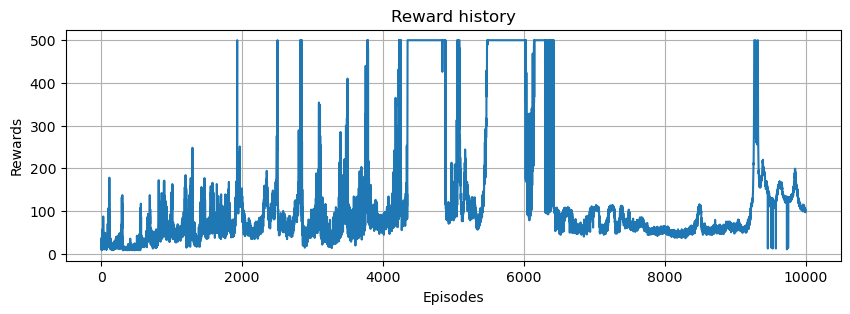

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(np.arange(10000), pg_rewards)
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
ax.set_title('Reward history')
ax.grid()